# 5. Q-Learning  
**Author**: Your Name  
**Date**: June 9, 2025  

## Introduction

Q-Learning is a **model-free, off-policy** Reinforcement Learning algorithm used to learn an optimal policy that maps states to actions for maximising cumulative rewards. It uses a **Q-Table** to estimate the expected utility of taking an action in a given state.

- **Type**: Reinforcement Learning  
- **Task**: Optimal action-selection policy  
- **Goal**: Learn the Q-value function Q(s, a)


In [2]:
!pip install gymnasium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [gymnasium]


In [3]:
import numpy as np
import gymnasium as gym
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


In [4]:
env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=False)
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

print("State Space Size:", state_space_size)
print("Action Space Size:", action_space_size)


State Space Size: 16
Action Space Size: 4


In [5]:
q_table = np.zeros((state_space_size, action_space_size))

total_episodes = 10000
learning_rate = 0.1
max_steps = 100
gamma = 0.99

epsilon = 1.0
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.001


In [6]:
rewards = []
print("--- Starting Training ---")

for episode in range(total_episodes):
    state, info = env.reset()
    total_rewards = 0

    for step in range(max_steps):
        exp_exp_tradeoff = random.uniform(0, 1)

        if exp_exp_tradeoff > epsilon:
            action = np.argmax(q_table[state, :])
        else:
            action = env.action_space.sample()

        new_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated

        q_table[state, action] = q_table[state, action] + learning_rate * (
            reward + gamma * np.max(q_table[new_state, :]) - q_table[state, action]
        )

        total_rewards += reward
        state = new_state

        if done:
            break

    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
    rewards.append(total_rewards)

    if (episode + 1) % 1000 == 0:
        print(f"Episode {episode + 1}/{total_episodes} completed.")

print("--- Training Finished ---")
print("\nFinal Q-Table:\n", q_table)


--- Starting Training ---
Episode 1000/10000 completed.
Episode 2000/10000 completed.
Episode 3000/10000 completed.
Episode 4000/10000 completed.
Episode 5000/10000 completed.
Episode 6000/10000 completed.
Episode 7000/10000 completed.
Episode 8000/10000 completed.
Episode 9000/10000 completed.
Episode 10000/10000 completed.
--- Training Finished ---

Final Q-Table:
 [[0.94148015 0.95099005 0.93206535 0.94148015]
 [0.94148015 0.         0.68687759 0.84658292]
 [0.52241013 0.917494   0.04971743 0.26318848]
 [0.20181116 0.         0.01836027 0.00372748]
 [0.95099005 0.96059601 0.         0.94148015]
 [0.         0.         0.         0.        ]
 [0.         0.98009996 0.         0.59649508]
 [0.         0.         0.         0.        ]
 [0.96059601 0.         0.970299   0.95099005]
 [0.960596   0.98009905 0.9801     0.        ]
 [0.97029889 0.99       0.         0.97029848]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.7947

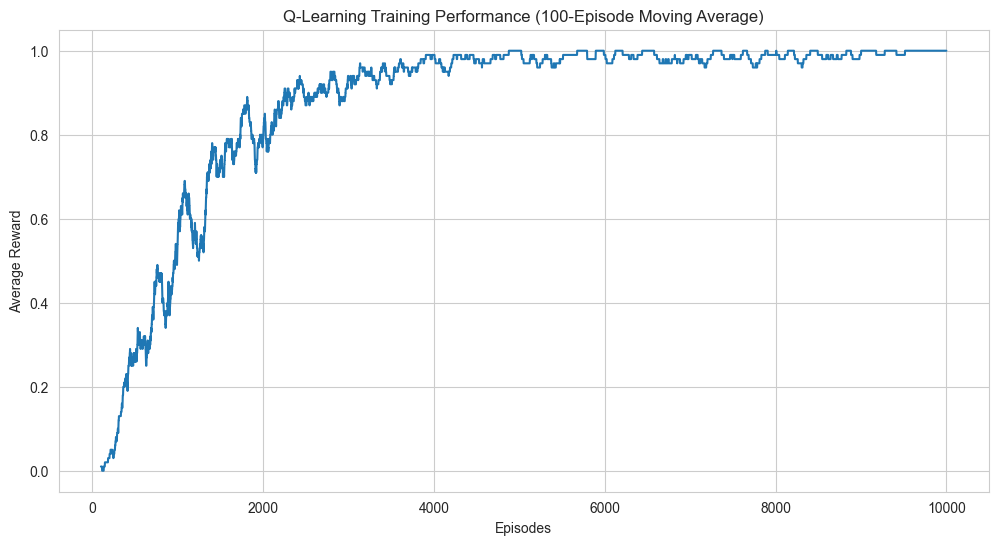

In [7]:
import pandas as pd

moving_avg_rewards = pd.Series(rewards).rolling(100).mean()

plt.figure(figsize=(12, 6))
plt.plot(moving_avg_rewards)
plt.title('Q-Learning Training Performance (100-Episode Moving Average)')
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.grid(True)
plt.show()


In [8]:
state, info = env.reset()
done = False
print("\n--- WATCHING THE TRAINED AGENT ---")

for step in range(max_steps):
    action = np.argmax(q_table[state, :])
    new_state, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    print(f"Step {step + 1}: State={state}, Action={action}, New State={new_state}, Reward={reward}")

    if done:
        print("\n--- Episode Finished ---")
        if reward == 1:
            print("****Agent reached the goal!****")
        else:
            print("****Agent fell into a hole.****")
        break

    state = new_state

env.close()



--- WATCHING THE TRAINED AGENT ---
Step 1: State=0, Action=1, New State=4, Reward=0.0
Step 2: State=4, Action=1, New State=8, Reward=0.0
Step 3: State=8, Action=2, New State=9, Reward=0.0
Step 4: State=9, Action=2, New State=10, Reward=0.0
Step 5: State=10, Action=1, New State=14, Reward=0.0
Step 6: State=14, Action=2, New State=15, Reward=1.0

--- Episode Finished ---
****Agent reached the goal!****


## Key Takeaways

- Q-Learning estimates action values using the Bellman Equation.
- It uses a Q-table for storing Q(s,a) values.
- The ε-greedy policy balances exploration vs. exploitation.
- Works well in small, discrete environments.
- Does not scale to continuous or high-dimensional spaces — where DQNs are needed.
